
# Project: Investigate a Dataset (TMDb-movie dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: We are investigating and explorling the TMDb-movie dataset. This dataset contains information regarding 10k movie such as: movie budget, revenue, cast, director, production, vote count, etc.

> Questions to answer:   
1- Which movie earns the most and least profit.          
2- Which Movies with longest and shortest runtime.       
3- Is the profit increasing or decreasing over years.         
4- Is the budget increasing or decreasing over years.     
5- Is the revenue increasing or decreasing over years.         
6- which genres with most and least popularity.   

In [298]:
#importing the packages that I am gonna use in the project.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> In this section , I will load the data, then explore and analyze it to know how to clean it and what changes should i make on it to make it ready to answer the questions. 

### General Properties

In [299]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#loading the tmdb-movies.csv file and storing it to the variable 'df'.
df = pd.read_csv('tmdb-movies.csv')
#printing the first 5 lines of df.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning (Removing any unnecessary information and modify the dataset to make it ready for answering questions)

In [300]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [301]:
#getting information about my dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### 1- Drop Extraneous Columns

In [302]:
#remove unnecessary columns in answering questions.
ext_col = ['id', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies','release_date','vote_average','vote_count', 'budget_adj', 'revenue_adj']
df.drop(ext_col, axis = 1, inplace = True)

#confirm changes
df.head(5)

,popularity,budget,revenue,original_title,runtime,genres,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015


In [303]:
#getting information about the dataset after dropping unnecessary columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_year      10866 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 594.3+ KB


### 2- Drop Rows with Missing Values(if any)

In [304]:
#view missing values
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_year       0
dtype: int64

In [305]:
#drop missing values
df.dropna(inplace = True)

In [306]:
#check if there is still any missing values
df.isnull().sum().any()

False

### 3- Drop Duplicated Rows(if any)

In [307]:
#view duplicated rows
df.duplicated().sum()


1

In [308]:
#remove duplicated rows
df.drop_duplicates(inplace = True)

In [309]:
#check if there are any duplicated rows
df.duplicated().sum()

0

### 4- Inspecting Data Types

In [310]:
#check each column type
df.dtypes

popularity        float64
budget              int64
revenue             int64
original_title     object
runtime             int64
genres             object
release_year        int64
dtype: object

> All data types are correct.

### 5- Check Zero Values in budget, revenue, and runtime Columns

In [311]:
#check zero values in budget and revenue columns.
df.query('budget == 0 | revenue == 0').head()

,popularity,budget,revenue,original_title,runtime,genres,release_year
30,3.927333,0,29355203,Mr. Holmes,103,Mystery|Drama,2015
36,3.358321,0,22354572,Solace,101,Crime|Drama|Mystery,2015
48,2.932340,30000000,0,Wild Card,92,Thriller|Crime|Drama,2015
67,2.331636,20000000,0,Survivor,96,Crime|Thriller|Action,2015
72,2.272044,0,45895,Beyond the Reach,95,Thriller,2015


In [312]:
#counting the zero values in budget and revenue columns.
df.query('budget == 0 | revenue == 0').count()

popularity        6988
budget            6988
revenue           6988
original_title    6988
runtime           6988
genres            6988
release_year      6988
dtype: int64

> I think it will be difficult to replace those zero values with real values because I need data(which I don't have) to extract those information from, also replacing them with 'Null' then removing them will affect answering the questions because they are like more than half of the dataset, so I will keep them.

In [313]:
#check zero values in runtime column.
df.query('runtime == 0').head()

,popularity,budget,revenue,original_title,runtime,genres,release_year
92,1.876037,0,0,Mythica: The Necromancer,0,Fantasy|Action|Adventure,2015
334,0.357654,0,0,Ronaldo,0,Documentary,2015
410,0.097514,0,0,Anarchy Parlor,0,Horror,2015
445,0.218528,0,0,The Exorcism of Molly Hartley,0,Horror,2015
486,0.176744,0,0,If There Be Thorns,0,TV Movie|Drama,2015


In [314]:
#counting the zero values in runtime column.
df.query('runtime == 0').count()

popularity        30
budget            30
revenue           30
original_title    30
runtime           30
genres            30
release_year      30
dtype: int64

> I will replace those zero values with the mean.

In [315]:
#calculating the mean of the runtime column.
mean = df.runtime.mean()
#getting the integer value of the mean.
mean = int(mean)
mean 

102

In [316]:
#replacing the zero values with the mean
df.runtime.replace(0, mean, inplace = True)
#confirm changes
df.query('runtime == 0').count()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_year      0
dtype: int64

In [317]:
df.shape

(10842, 7)

### 6- Modify the genres column

In [318]:
df_g = df[df.genres.apply(lambda x: '|' in x)]
df_g.head()

,popularity,budget,revenue,original_title,runtime,genres,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015


> We need to separate values in genres column to make each cell has one movie type and that will facilitate answering our questions.

In [319]:
#check the max number of ('|') in each row in genres column to know the maximum types to separate.
df_g.genres.apply(lambda x: x.count('|')).max()

4

> Now we have a maximum of 5 movie-type, so I will make 5 copies of df_g.     
   the first copy contains the first movie type.      
   the second copy contains the second movie type.    
   the third copy contains the third movie type.    
   the fourth copy contains the fourth movie type.    
   the fifth copy contains the fifth movie type.   
   

In [320]:
#making 5 copies of df_g
df0 = df_g.copy()
df1 = df_g.copy()
df2 = df_g.copy()
df3 = df_g.copy()
df4 = df_g.copy()

In [321]:
#the first copy
df0.genres = df0.genres.apply(lambda x : x.split('|')[0])
df0.head()

,popularity,budget,revenue,original_title,runtime,genres,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action,2015


In [322]:
#the second copy
df1.genres = df1.genres.apply(lambda x : x.split('|')[1])
df1.head()

,popularity,budget,revenue,original_title,runtime,genres,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Adventure,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Adventure,2015
2,13.112507,110000000,295238201,Insurgent,119,Science Fiction,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Adventure,2015
4,9.335014,190000000,1506249360,Furious 7,137,Crime,2015


In [323]:
#the third copy
df2.genres = df2.genres.apply(lambda x: x.split('|')[2] if x.count('|') >= 2 else np.nan)
df2.head()

,popularity,budget,revenue,original_title,runtime,genres,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Science Fiction,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Science Fiction,2015
2,13.112507,110000000,295238201,Insurgent,119,Thriller,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Science Fiction,2015
4,9.335014,190000000,1506249360,Furious 7,137,Thriller,2015


In [324]:
#the fourth copy
df3.genres = df3.genres.apply(lambda x : x.split('|')[3] if x.count('|') >= 3 else np.nan)
df3.head()

,popularity,budget,revenue,original_title,runtime,genres,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Thriller,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Thriller,2015
2,13.112507,110000000,295238201,Insurgent,119,NaN,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Fantasy,2015
4,9.335014,190000000,1506249360,Furious 7,137,NaN,2015


In [325]:
#the fifth copy
df4.genres = df4.genres.apply(lambda x : x.split('|')[4] if x.count('|') >= 4 else np.nan)
df4.head()

,popularity,budget,revenue,original_title,runtime,genres,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,NaN,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,NaN,2015
2,13.112507,110000000,295238201,Insurgent,119,NaN,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,NaN,2015
4,9.335014,190000000,1506249360,Furious 7,137,NaN,2015


> I am going to delete the rows with 'Null' values in each row in each copy.   
  The first and the second copies have no 'Null' values, so we will start wih the third copy.
 

In [326]:
#removing null values in df2
df2.dropna(inplace = True)
#confirm changes
df2.isnull().sum().any()

False

In [327]:
#removing null values in df3
df3.dropna(inplace = True)
#confirm changes
df3.isnull().sum().any()

False

In [328]:
#removing null values in df4
df4.dropna(inplace = True)
#confirm changes
df4.isnull().sum().any()

False

In [329]:
frames = [df0, df1, df2, df3, df4]
new_rows = pd.concat(frames)
new_rows.head()

,popularity,budget,revenue,original_title,runtime,genres,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action,2015


> Now we need to remove the movie types that contain ('|') from the original dataset (df), then we add the modified generes - column dataset(new_rows).

In [330]:
#removing the movie types that contains ('|')
df.drop(df_g.index, inplace = True)
df.head()


,popularity,budget,revenue,original_title,runtime,genres,release_year
25,4.566713,150000000,682330139,Mission: Impossible - Rogue Nation,131,Action,2015
26,4.564549,68000000,215863606,Ted 2,115,Comedy,2015
51,2.814802,35000000,194564672,The Intern,121,Comedy,2015
55,2.584264,20000000,36606743,Burnt,100,Drama,2015
58,2.557859,15000000,64191523,The Danish Girl,120,Drama,2015


In [331]:
#adding the modified generes - column dataset(new_rows) to (df)
df = df.append(new_rows, ignore_index=True)
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_year
0,4.566713,150000000,682330139,Mission: Impossible - Rogue Nation,131,Action,2015
1,4.564549,68000000,215863606,Ted 2,115,Comedy,2015
2,2.814802,35000000,194564672,The Intern,121,Comedy,2015
3,2.584264,20000000,36606743,Burnt,100,Drama,2015
4,2.557859,15000000,64191523,The Danish Girl,120,Drama,2015


> I need to know the profit of each movie, so I will insert a new column called 'profit' subtracting 'budget' column from 'revenue' column.

In [332]:
#inserting 'profit' column
df.insert(3, 'profit', df.revenue-df.budget)
#confirm changes
df.head()

,popularity,budget,revenue,profit,original_title,runtime,genres,release_year
0,4.566713,150000000,682330139,532330139,Mission: Impossible - Rogue Nation,131,Action,2015
1,4.564549,68000000,215863606,147863606,Ted 2,115,Comedy,2015
2,2.814802,35000000,194564672,159564672,The Intern,121,Comedy,2015
3,2.584264,20000000,36606743,16606743,Burnt,100,Drama,2015
4,2.557859,15000000,64191523,49191523,The Danish Girl,120,Drama,2015


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which movie earns the most and least profit?)

> We want to know the movie with maximum profit and the movie with the minimum profit.

In [333]:
#calculating the maximum profit.
max_profit_movie_value = df.profit.max()
#calculating the minimum profit.
min_profit_movie_value = df.profit.min()
#getting the maximum-profit movie
max_profit_movie_name = df.query('profit == @max_profit_movie_value').original_title.unique()
#getting the minimum-profit movie
min_profit_movie_name = df.query('profit == @min_profit_movie_value').original_title.unique()

print('The movie earns the most profit is:', list(max_profit_movie_name), 'with', max_profit_movie_value, 'US_dollars')
print('The movie earns the least profit is:', list(min_profit_movie_name), 'with', min_profit_movie_value, 'US_dollars')

The movie earns the most profit is: ['Avatar'] with 2544505847 US_dollars
The movie earns the least profit is: ["The Warrior's Way"] with -413912431 US_dollars


In [334]:
#properties associated with the maximum_profit movie.
df.query('profit == @max_profit_movie_value')

,popularity,budget,revenue,profit,original_title,runtime,genres,release_year
3279,9.432768,237000000,2781505847,2544505847,Avatar,162,Action,2009
11793,9.432768,237000000,2781505847,2544505847,Avatar,162,Adventure,2009
19844,9.432768,237000000,2781505847,2544505847,Avatar,162,Fantasy,2009
24586,9.432768,237000000,2781505847,2544505847,Avatar,162,Science Fiction,2009


In [335]:
#properties associated with the minimum_profit movie.
df.query('profit == @min_profit_movie_value')

,popularity,budget,revenue,profit,original_title,runtime,genres,release_year
3967,0.25054,425000000,11087569,-413912431,The Warrior's Way,100,Adventure,2010
12481,0.25054,425000000,11087569,-413912431,The Warrior's Way,100,Fantasy,2010
20281,0.25054,425000000,11087569,-413912431,The Warrior's Way,100,Action,2010
24756,0.25054,425000000,11087569,-413912431,The Warrior's Way,100,Western,2010
26495,0.25054,425000000,11087569,-413912431,The Warrior's Way,100,Thriller,2010


### Research Question 2  (Which Movies with longest and shortest runtime)

> We want to know the movie with largest runtime and the movie with the shortest runtime.

In [336]:
#calculating the longest runtime
max_runtime = df.runtime.max()
#calculating the shortest runtime
min_runtime = df.runtime.min()
#getting the longest-runtime movie
max_rutime_movie = df.query('runtime == @max_runtime').original_title.unique()
#getting the shortest-runtime movies
min_rutime_movie = df.query('runtime == @min_runtime').original_title.unique()
print('The movie with the longest runtime is:', list(max_rutime_movie), 'with', max_runtime, 'minute')
print('The movie with the shortest runtime is:', list(min_rutime_movie), 'with', min_runtime, 'minutes')


The movie with the longest runtime is: ['The Story of Film: An Odyssey'] with 900 minute
The movie with the shortest runtime is: ['Fresh Guacamole', 'The Adventures of AndrÃ© and Wally B.', 'Luxo Jr.', 'Bambi Meets Godzilla'] with 2 minutes


In [337]:
#properties associated with the longest-time movie.
df.query('runtime == @max_runtime')

,popularity,budget,revenue,profit,original_title,runtime,genres,release_year
949,0.006925,0,0,0,The Story of Film: An Odyssey,900,Documentary,2011


In [338]:
#properties associated with the shortest-time movies.
df.query('runtime == @min_runtime')

,popularity,budget,revenue,profit,original_title,runtime,genres,release_year
1151,0.078472,0,0,0,Fresh Guacamole,2,Animation,2012
1837,0.647261,0,0,0,The Adventures of AndrÃ© and Wally B.,2,Animation,1984
10583,0.306425,0,0,0,Luxo Jr.,2,Animation,1986
10752,0.002757,0,0,0,Bambi Meets Godzilla,2,Animation,1969
19097,0.306425,0,0,0,Luxo Jr.,2,Family,1986
19266,0.002757,0,0,0,Bambi Meets Godzilla,2,Comedy,1969


### Research Question 3 (Is the profit increasing or decreasing over years )

> We want to know how the profit is affected by time(years)

In [339]:
def relation_over_years(changed_value):         
    value_by_year = df.groupby('release_year')[changed_value].sum()
    plt.figure(figsize = (8,4), dpi = 150)
    plt.title('The relation between the ' + changed_value + ' of movies and years')
    plt.xlabel('years')
    plt.ylabel(changed_value + ' in US_dollars')
    return plt.plot(value_by_year)

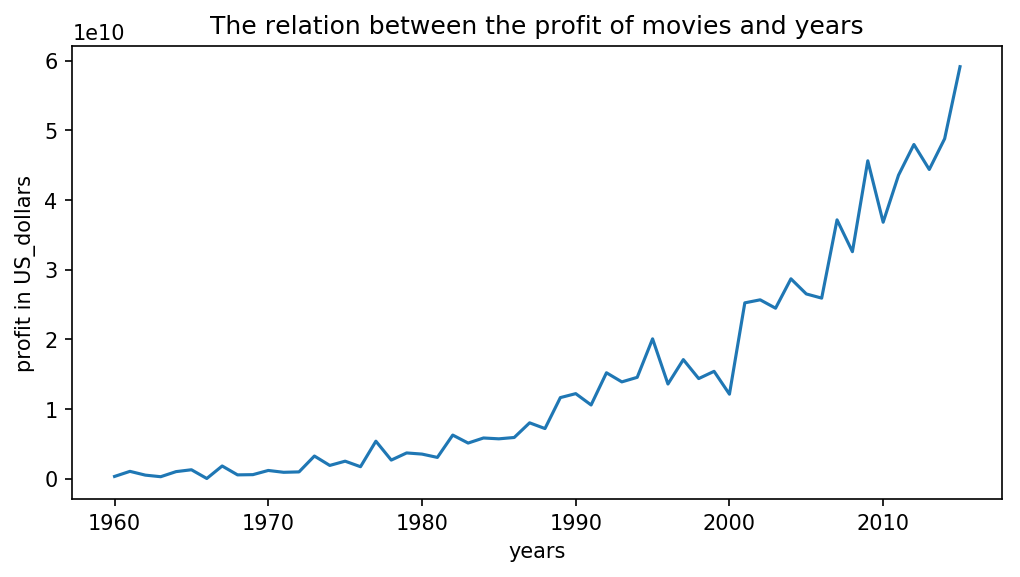

In [340]:
relation_over_years('profit');

> From the previous graph, we can educe that the profit increases by year.

### Research Question 4 (Is the budget increasing or decreasing over years )

> We want to know if the budget is affected by time(years)

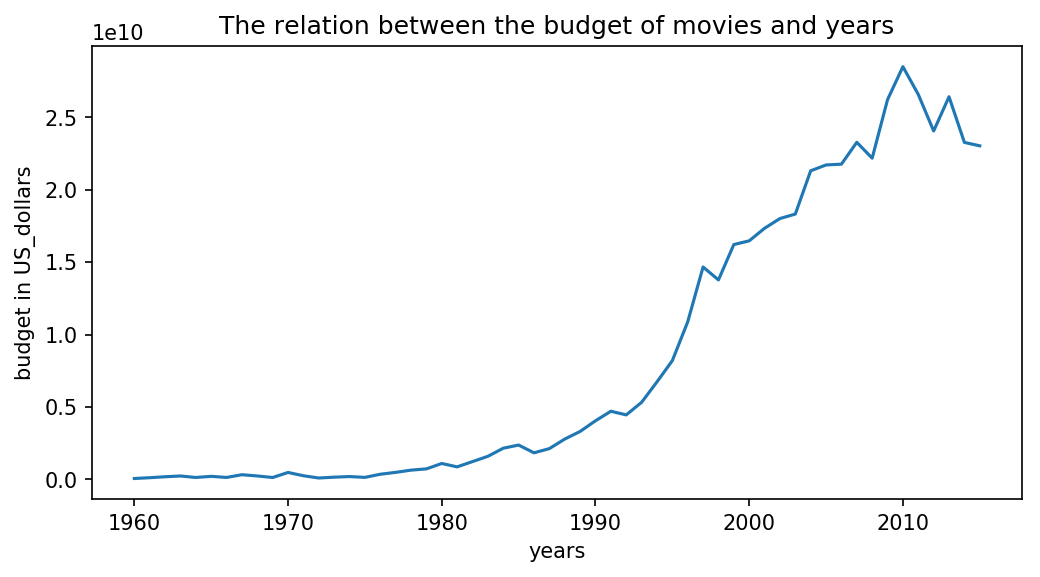

In [341]:
relation_over_years('budget');

> From the previous graph, we can educe that the budget increases by year.

### Research Question 5 (Is the revenue increasing or decreasing over years)

> We want to know if the revenue is affected by time(years)

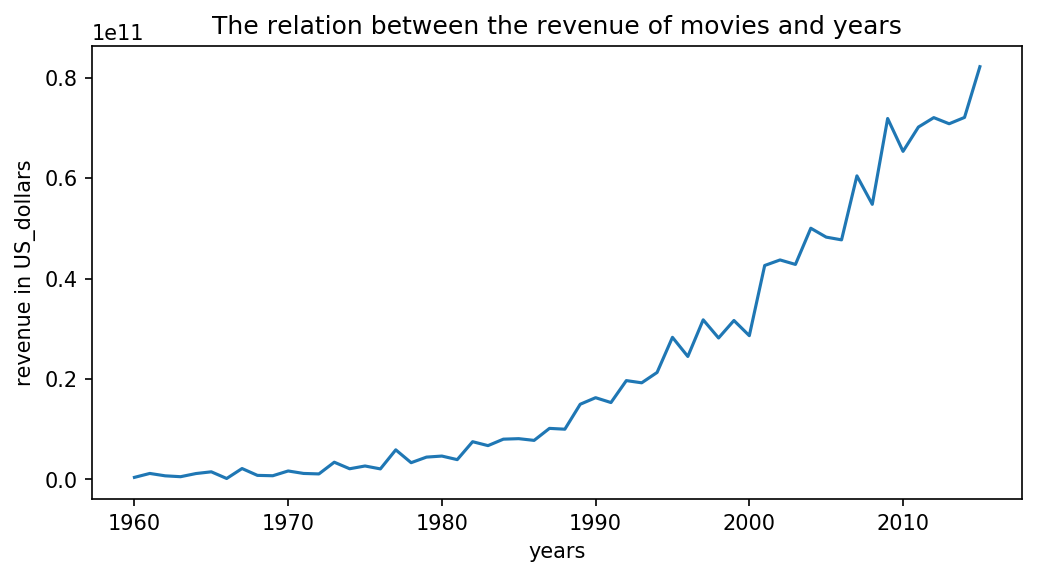

In [342]:
relation_over_years('revenue');

> From the previous graph, we can educe that the revenue increases by year.

### Research Question 6 (which genres are more and less successful)

> We want to count each movie type and see which is more and less successful.

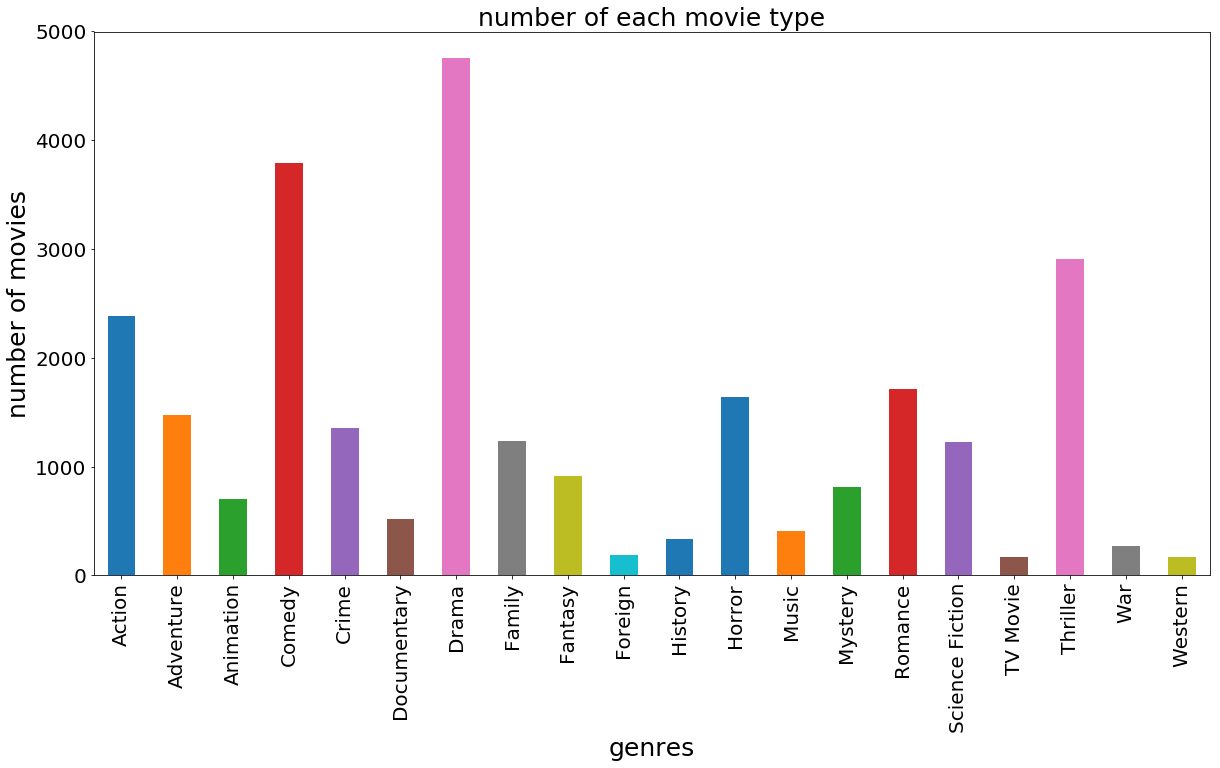

In [343]:
movie_type_by_year = df.groupby('genres')['genres'].count()
plt.title('number of each movie type', size = 25)
plt.xlabel('genres', size = 25)
plt.ylabel('number of movies', size = 25)
movie_type_by_year.plot.bar(figsize = (20,10), fontsize = 20);

> From the previous graph, we can educe that 'Drama' movie-type is the most successful and 'Western', 'TV Movie', and 'Foreign' movies are less successful.

### Research Question 6 (which genres with most and least popularity)

> We want to know the popularity for each movie type.

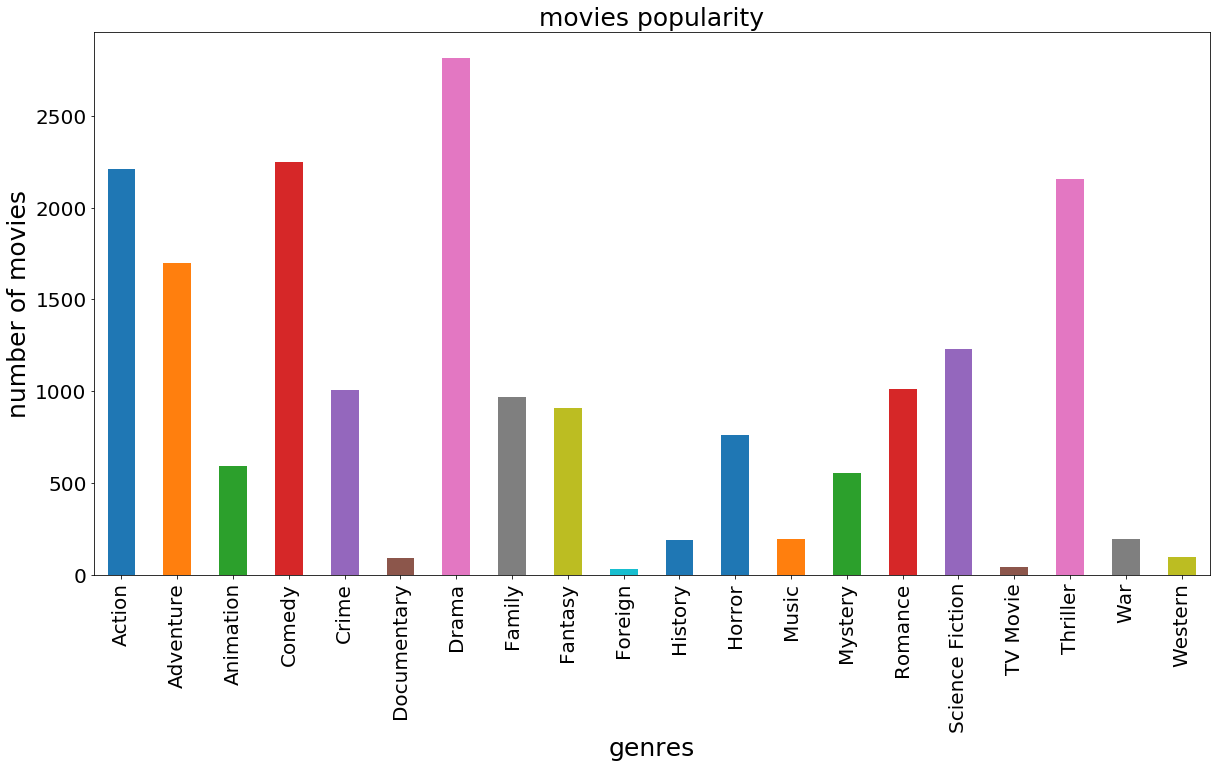

In [344]:
movie_popularity = df.groupby('genres')['popularity'].sum()
plt.title('movies popularity', size = 25)
plt.xlabel('genres', size = 25)
plt.ylabel('number of movies', size = 25)
movie_popularity.plot(kind = 'bar', figsize = (20,10), fontsize = 20);

From the previous graph, we can educe that 'Drama' movie-type is the most successful and 'Western', 'TV Movie','Documentary,  and 'Foreign' movies are less successful.

<a id='conclusions'></a>
## Conclusion
> - 'Drama' movie-type is the best choice for any viewer wants to look for a movie to watch.   
> - When I ckecked the zero-values in both budget and revenue columns, I found out that they are like half of the dataframe, and I saw it will be difficult to replace them with real values because I needed data(which I don't have) to extract those information from, also replacing them with 'Null' then removing them will affect answering the questions because they are numerous, so I decided keep them.
> - Each of budget, revenue, and profit is increasing year by year. I think it's an indication of more creativity and success, but I alse think that increasing in money should have a limit.
> - The longest-time movie is '900' minutes. I think it's too much for people to handle and it should be shorter than that.
> - 'Documentary' is one of the lowest viewing movie types. I think it should take more credit because it's more related to real events in real life.

   

In [345]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0